<a href="https://colab.research.google.com/github/ahcamachod/2145-data-science-probando-relaciones-con-regresion-lineal/blob/main/precios_de_inmuebles_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Precificación inmobiliaria**

**Objetivo**: Estimar los precios de los inmuebles.
 * Identificar los aspectos que tienen más influencia en la precificación de los inmuebles.
 * Entender cuál de todos estos aspectos es el más relevante.
 * Precificar un inmueble nuevo.

Base de datos simplificada e inspirada en [House Prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)



![](https://i.imgur.com/A8X79yq.jpeg)


# 1. Ajustando una recta

## Conociendo los datos

In [128]:
#Leyendo los datos
import pandas as pd


datos = pd.read_csv('./data/precios_casas.csv')
datos.head(2)

,Id,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente,precio_de_venta
0,1,79.5224,1,79.3366,2,548,0,1027905.0
1,2,117.2398,0,0.0000,2,460,0,894795.0


In [129]:
#Cuáles factores fueron colectados
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           1438 non-null   int64  
 1   area_primer_piso             1438 non-null   float64
 2   tiene_segundo_piso           1438 non-null   int64  
 3   area_segundo_piso            1438 non-null   float64
 4   cantidad_banos               1438 non-null   int64  
 5   capacidad_carros_garage      1438 non-null   int64  
 6   calidad_de_cocina_excelente  1438 non-null   int64  
 7   precio_de_venta              1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [130]:
datos = datos.drop(columns='Id')
datos.columns

Index(['area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente', 'precio_de_venta'],
      dtype='object')

## Correlación

**¿Cuáles factores están relacionados con el precio de la casa? ¿Cómo es esa relación?**

El coeficiente de correlación de Pearson nos permite medir la relación lineal entre variables, ofreciendo una escala que varía de -1 a 1, la cual interpretamos según su intensidad y dirección:

* **-1**: correlación negativa perfecta: a medida que una variable aumenta, la otra disminuye.  
* **0**: no hay relación lineal entre las variables.  
* **1**: correlación positiva perfecta: a medida que una variable aumenta, la otra también aumenta.  



In [131]:
# Correlación
corr = datos.corr()

In [132]:
corr['precio_de_venta']

area_primer_piso               0.616557
tiene_segundo_piso             0.138541
area_segundo_piso              0.305311
cantidad_banos                 0.563132
capacidad_carros_garage        0.640214
calidad_de_cocina_excelente    0.496223
precio_de_venta                1.000000
Name: precio_de_venta, dtype: float64

In [133]:
# Actividad
# Cuáles factores están más correlacionados?
corr['capacidad_carros_garage']

area_primer_piso               0.481231
tiene_segundo_piso            -0.001284
area_segundo_piso              0.131938
cantidad_banos                 0.409281
capacidad_carros_garage        1.000000
calidad_de_cocina_excelente    0.276759
precio_de_venta                0.640214
Name: capacidad_carros_garage, dtype: float64

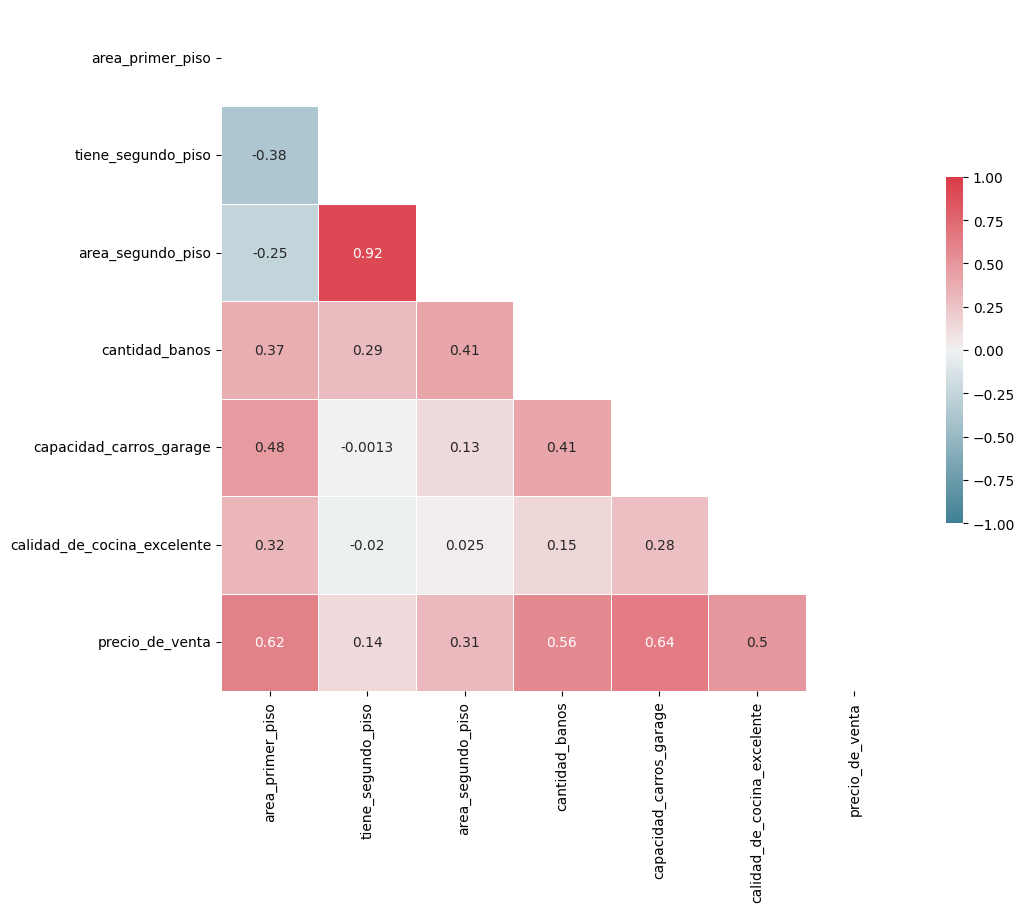

In [134]:
# Actividad
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ¿Qué factores están más correlacionados?

# Generar una máscara para el triángulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Mostrar el mapa de calor (heatmap)
plt.show()


## Relacionando variables

In [135]:
# importando los paquetes para la visualización
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

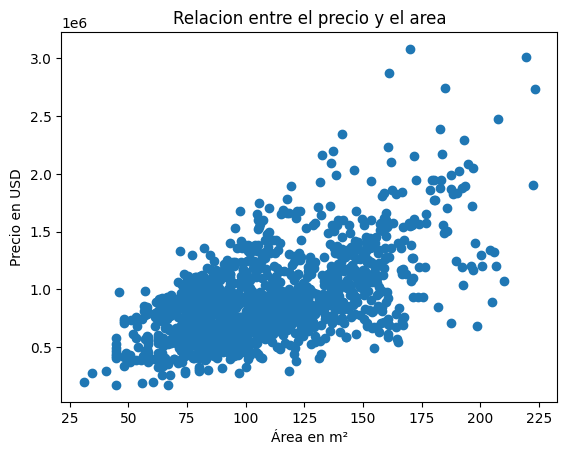

In [136]:
# Cómo se relacionan el área construída y el precio del inmueble?
# grafico de dispercion 
plt.scatter(datos['area_primer_piso'],datos['precio_de_venta'])
plt.title('Relacion entre el precio y el area')
plt.xlabel('Área en m²')
plt.ylabel('Precio en USD')
plt.show()

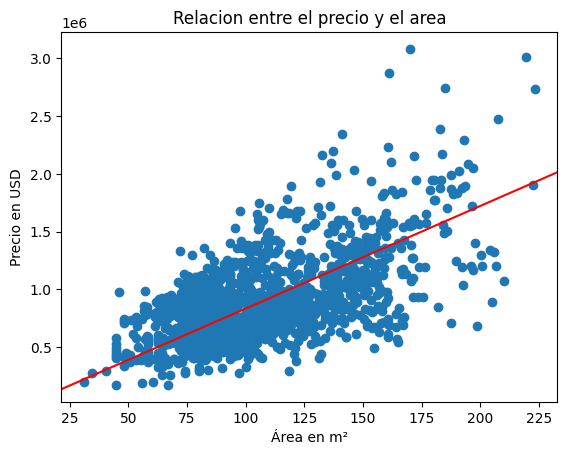

In [137]:
# Aparentemente mientras mayor es el área del primer piso, mayor es el precio de la casa.
# E si quisieramos trazar una línea que nos permita describir este comportamiento?

# grafico de dispercion 
plt.scatter(datos['area_primer_piso'],datos['precio_de_venta'])
plt.axline(xy1=(40,300000),xy2=(175, 1500000), color='red')
plt.title('Relacion entre el precio y el area')
plt.xlabel('Área en m²')
plt.ylabel('Precio en USD')
plt.show()


## Mejor recta

In [138]:
# Cuál es la recta que mejor se ajusta a esta relación
px.scatter(datos, x='area_primer_piso', y='precio_de_venta', trendline_color_override='red', trendline='ols')

# 2. Explicando la recta
Ajustamos una recta entre los $m^2$ del primer piso y el precio de la casa. Queremos explicar el precio de la casa a partir de su tamaño, por eso decimos que:

* Variable explicativa/independiente: Área del primer piso  
* Variable de respuesta/dependiente: Precio de la casa  

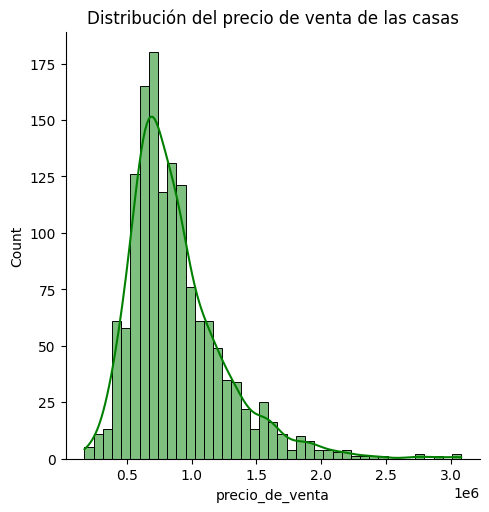

In [139]:
#Quién es nuestra variable de respuesta?
sns.displot(datos['precio_de_venta'],kde=True, color='green')
plt.title('Distribución del precio de venta de las casas')
plt.show()

### Separando datos para entrenamiento y para prueba

El conjunto de **entrenamiento** se utiliza para ajustar el modelo, mientras que el conjunto de **prueba** se usa para evaluar su desempeño al predecir precios de viviendas no vistos durante el entrenamiento, lo que ayuda a la generalización del modelo.

In [140]:
# import train_test_split
from sklearn.model_selection import  train_test_split

y = datos['precio_de_venta']
X = datos.drop(columns='precio_de_venta')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=230) #garantizar la reproductividad de la segregacion de nuestros datos

In [141]:
#Datos de entrenamiento para usar la fórmula
df_train = pd.DataFrame(X_train)
df_train['precio_de_venta'] = y_train

In [142]:
# import ols / para utilizar la tecnica de minimos cuadrados ordinarios
from statsmodels.formula.api import ols

In [143]:
# ajustando el primer modelo
modelo_0 = ols('precio_de_venta ~ area_primer_piso', data=df_train).fit()

## Analizando los coeficientes

(intensidad, dirección y significancia)




In [144]:
# visualizando los parámetros
modelo_0.params

Intercept           152909.288334
area_primer_piso      6793.641641
dtype: float64

In [145]:
# El resumen del modelo
print(modelo_0.summary())

                            OLS Regression Results                            
Dep. Variable:        precio_de_venta   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Wed, 02 Jul 2025   Prob (F-statistic):          2.22e-105
Time:                        15:51:27   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.529e+05   3.07e+04  

- El **punto de intercepción** es el valor esperado del precio de la casa cuando todas las demás variables son cero. En este caso, cuando todas las demás variables, incluida el área del primer piso, son cero, el precio esperado de la casa es de $145.196,40. No siempre se tiene una interpretación práctica para este número.

- El **efecto individual** del área es de \$6.833,97. Esto indica que por cada metro cuadrado adicional al área del primer piso, se espera que el precio de la casa aumente en promedio \$6.833,97.

<img src="https://i.ibb.co/CJwfMgW/coeficientes.png" alt="coeficientes" border="0">


## Explicabilidad del modelo

**¿En qué medida la variación del área explica los diversos precios de las casas?**  

En este caso, recurrimos a la métrica R², el coeficiente de determinación. El R² varía de 0 a 1, donde 1 indica un ajuste perfecto del modelo a los datos, es decir, todas las variaciones en la variable dependiente son explicadas por las variables independientes en el modelo. Por otro lado, un R² de 0 indica que el modelo no explica ninguna variabilidad en la variable dependiente.

In [146]:
# observando el R²
modelo_0.rsquared

np.float64(0.37728010994297867)

## Entendiendo el resíduo

In [147]:
# Quiénes son los residuos?
modelo_0.resid

1303   -193023.838744
326    -144522.356193
386     399612.747641
615     -68449.596607
236     166010.592859
            ...      
777     465872.680999
271    -497642.319788
723     461150.204718
560    -540482.733402
768     -37547.820756
Length: 1006, dtype: float64

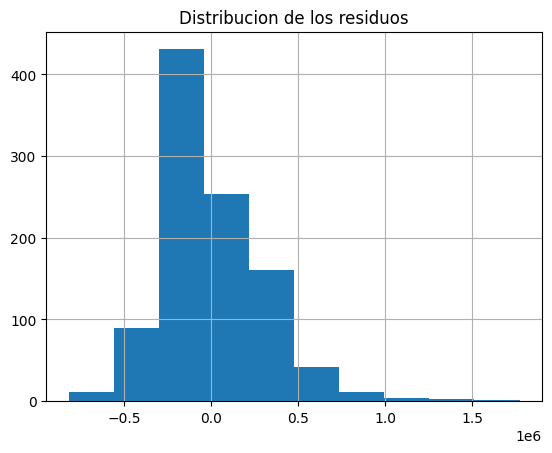

In [148]:
# Cómo están distribuidos
modelo_0.resid.hist()
plt.title('Distribucion de los residuos')
plt.show()

<img src="https://i.ibb.co/zGTB35V/residuos.png" alt="residuos" border="0">

## Obteniendo el R² de la previsión

In [149]:
# definiendo la 'Y' prevista
y_predict = modelo_0.predict(X_test)

In [150]:
# importando el r2_score
from sklearn.metrics import r2_score

In [151]:
# mostrando el resultado de r²
print(f'El coeficiente de determinación de R² para el modelo con los datos de prueba es: {round(r2_score(y_test, y_predict),2)}')

El coeficiente de determinación de R² para el modelo con los datos de prueba es: 0.39


Durante esta clase, nos enfocamos en analizar el comportamiento de la variable respuesta, es decir, comprender el precio de venta de la casa.

Para esto, hicimos un histograma como recurso visual para facilitar este análisis.

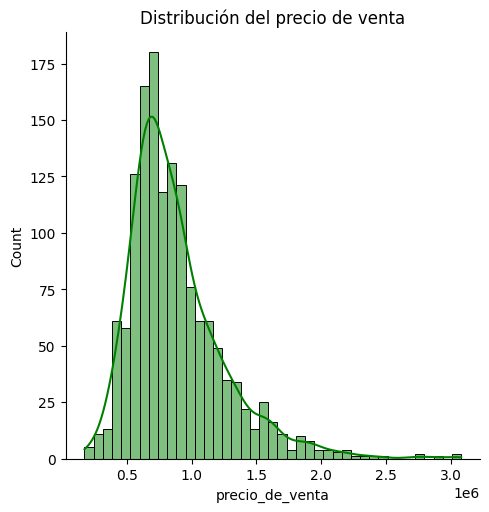

In [152]:
sns.displot(datos['precio_de_venta'], kde=True, color='green')
plt.title('Distribución del precio de venta')
plt.show()


En esta actividad, aplica la función displot de la biblioteca Seaborn (sns) y explora los aspectos de la visualización de datos. Para ello, utiliza tus conocimientos adquiridos hasta el momento y desarrolla tus habilidades aún más.

Esta función se usa para crear un gráfico de distribución. El parámetro kde=True indica que queremos trazar la densidad de kernel estimada sobre el histograma. A través de este ejercicio práctico, tendrás la posibilidad de visualizar la forma de la distribución con más suavidad.

# 3. Añadiendo otras características

El modelo con un solo factor nos mostró un R² de 0.38, es decir, aproximadamente el 38% de la variación observada en los precios de las casas puede explicarse por la variación en el área.  
Esto indica que aún existe una cantidad significativa de variación que no está siendo capturada por este modelo específico. Analizaremos otros factores para explicar el precio de las casas.

## Analizando los factores

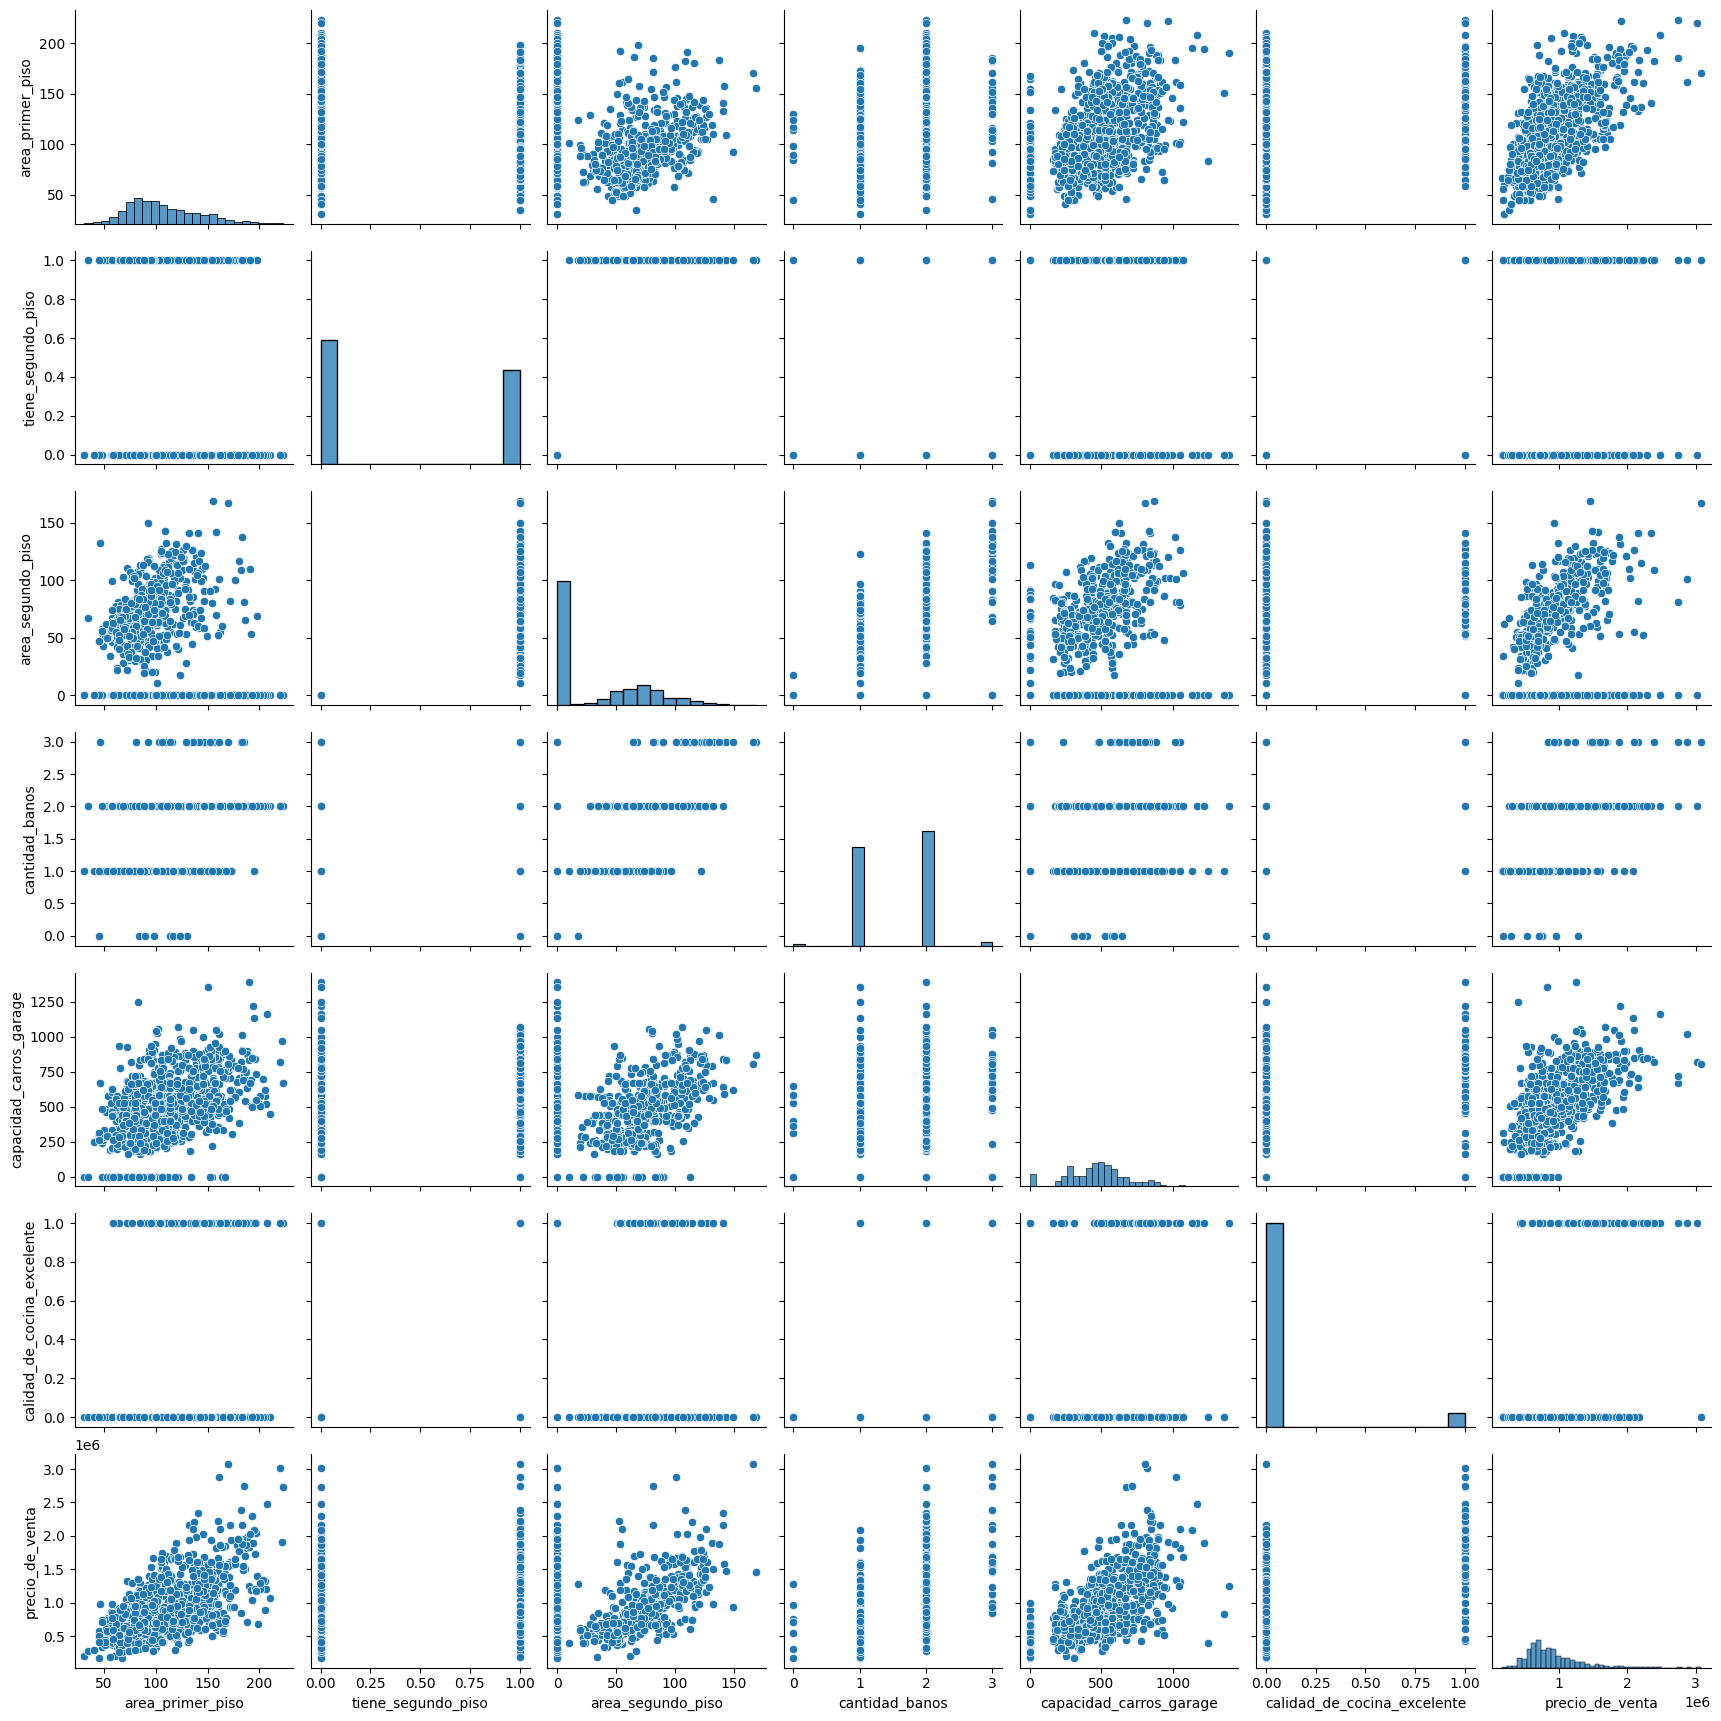

In [153]:
# cuáles otras características podrían explicar el precio de los inmuebles?
sns.pairplot(datos)

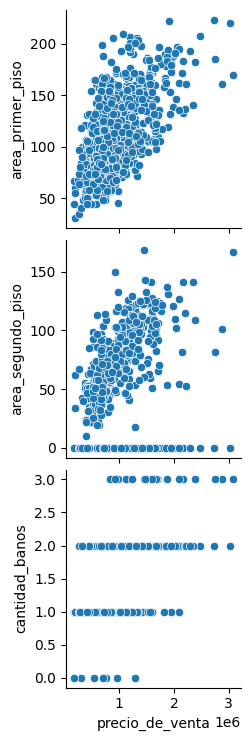

In [154]:
#Vamos a analizar solamente y_vars='precio_de_venta'
sns.pairplot(datos, y_vars=['area_primer_piso', 'area_segundo_piso', 'cantidad_banos'], x_vars='precio_de_venta')

## Añadiendo factores al modelo

In [155]:
# importando la api de statsmodels
import statsmodels.api as sm

In [156]:
# Añadiendo una constante
X_train = sm.add_constant(X_train)
X_train.head()

,const,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente
1303,1.0,65.7732,0,0.0000,1,0,0
326,1.0,55.3684,1,55.3684,1,189,0
386,1.0,74.6916,1,107.4853,2,560,0
615,1.0,103.6764,0,0.0000,1,440,0
236,1.0,94.2006,1,67.8170,2,457,0


In [157]:
X_train.columns

Index(['const', 'area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente'],
      dtype='object')

In [158]:
# Creando el modelo de regresión (con todas las variables): saturado
modelo_1 = sm.OLS(y_train, X_train[['const', 'area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente']]).fit()

In [159]:
# Modelo sin el área del segundo piso
modelo_2 = sm.OLS(y_train, X_train[['const', 'area_primer_piso', 'tiene_segundo_piso',
                                    'cantidad_banos', 'capacidad_carros_garage',
                                    'calidad_de_cocina_excelente']]).fit()

In [160]:
# Modelo sin la información del garage
# Modelo sin el área del segundo piso
modelo_3 = sm.OLS(y_train, X_train[['const', 'area_primer_piso', 'tiene_segundo_piso',
                                    'cantidad_banos', 'calidad_de_cocina_excelente']]).fit()

In [161]:
# Resumen del modelos
modelos = [modelo_0, modelo_1, modelo_2, modelo_3]

for i, j in enumerate(modelos):
    print(f'******************************************************************************\n****************** El modelo {i} tiene el siguiente resumen ********************\n******************************************************************************')
    print(j.summary(), '\n\n')

******************************************************************************
****************** El modelo 0 tiene el siguiente resumen ********************
******************************************************************************
                            OLS Regression Results                            
Dep. Variable:        precio_de_venta   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Wed, 02 Jul 2025   Prob (F-statistic):          2.22e-105
Time:                        15:51:38   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust               

In [162]:
for i, j in enumerate(modelos):
    print(f'El coeficiente de determinacion R2 del modelo {i}: {j.rsquared.round(2)}')

El coeficiente de determinacion R2 del modelo 0: 0.38
El coeficiente de determinacion R2 del modelo 1: 0.74
El coeficiente de determinacion R2 del modelo 2: 0.71
El coeficiente de determinacion R2 del modelo 3: 0.65


## Comparando los modelos
Cuál es el modelo?


In [163]:
# Cuántos parámetros tiene el modelo?
modelo_3.params

const                         -129979.678094
area_primer_piso                 6119.653184
tiene_segundo_piso             221306.959705
cantidad_banos                 149036.289458
calidad_de_cocina_excelente    444391.228573
dtype: float64

In [164]:
hoteles = pd.read_csv('./data/hoteis.csv')
hoteles.head(2)

,Estrelas,ProximidadeTurismo,Capacidade,Preco
0,5,9.301565,3,506.275452
1,1,1.785891,1,246.363458




Como persona Científica de Datos, estás a cargo del análisis del problema de fijación de precios de habitaciones de hoteles, utilizando el conjunto de datos proporcionado. Para ello, dispones de este dataset.

En esta actividad, tu tarea consiste en llevar a cabo las siguientes etapas:

    1.-análisis inicial con el PairPlot de Seaborn;
    2.-construir modelos de regresión lineal; y
    3.-realizar la comparación de estos modelos.

Dedica tiempo a las actividades y desarrolla tus habilidades a través de la aplicación de tus conocimientos adquiridos a lo largo del curso.


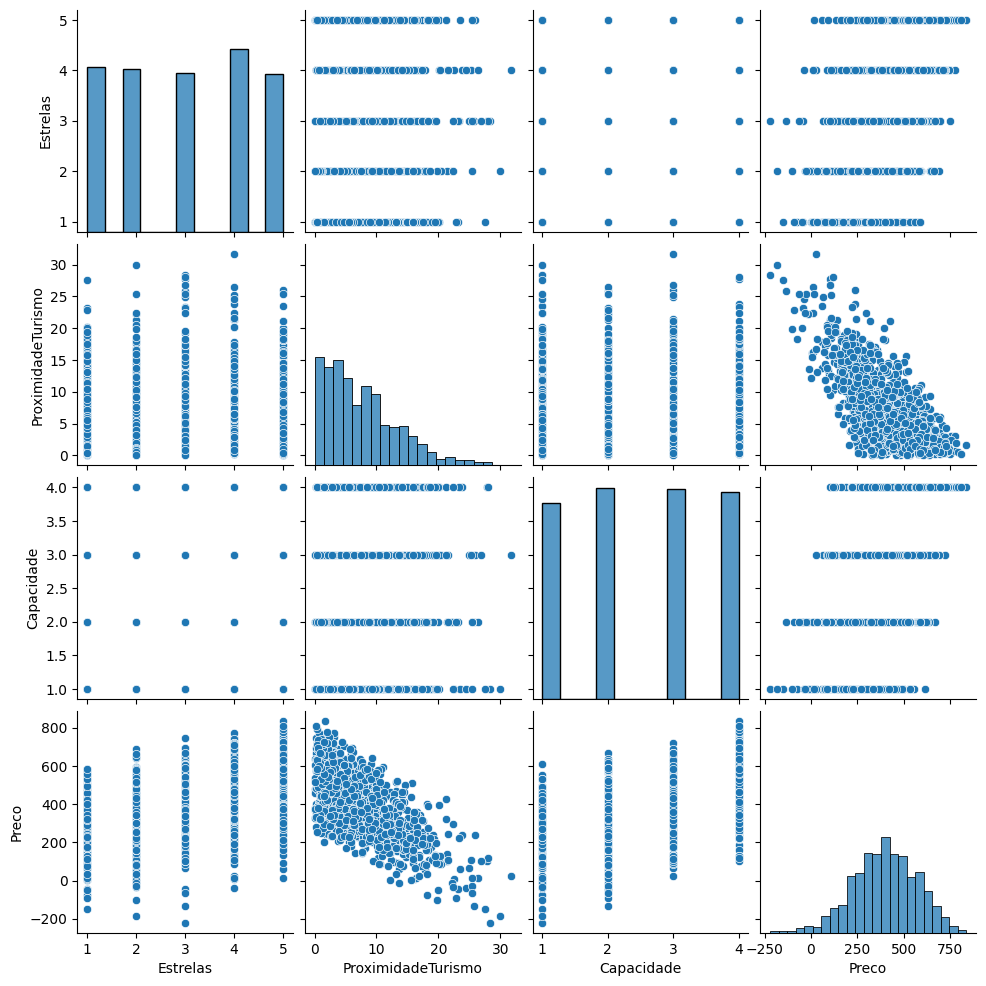

In [165]:
# 1.-análisis inicial con el PairPlot de Seaborn
sns.pairplot(hoteles)

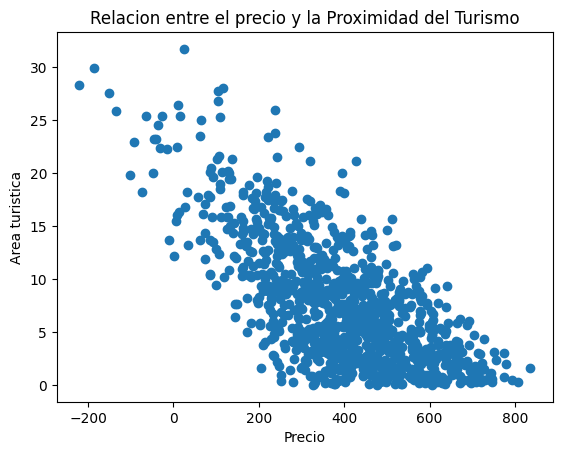

In [166]:
# modelo de regresion lineal
plt.scatter(hoteles['Preco'],hoteles['ProximidadeTurismo'])
plt.title('Relacion entre el precio y la Proximidad del Turismo')
plt.ylabel('Area turistica')
plt.xlabel('Precio')
plt.show()

# 4. Precificando las casas

## Obteniendo el R² de la previsión

In [167]:
# Añadiendo una constante en X_test
X_test = sm.add_constant(X_test)
X_test.head(2)

,const,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente
997,1.0,94.9438,0,0.0000,1,280,0
805,1.0,74.1342,1,78.2218,2,595,0


In [168]:
# Previsión con el modelo 3
prevision_3 = modelo_3.predict(X_test[['const', 'area_primer_piso',	'tiene_segundo_piso', 'cantidad_banos', 'calidad_de_cocina_excelente']])

In [169]:
# Cuál es el r² de la previsión?
print(f'El coeficiente R² de la baase de prevision es: {modelo_3.rsquared.round(2)}')

El coeficiente R² de la baase de prevision es: 0.65


In [170]:
# Cuál es el R² del entrenamiento?
print(f'El coeficiente R² con respecto a la base de entrenamiento es: {round(r2_score(y_test, prevision_3),2)}')

El coeficiente R² con respecto a la base de entrenamiento es: 0.64


El coeficiente de determinación (R²) es una métrica fundamental en modelos de regresión, ya que indica la proporción de la varianza en la variable de respuesta que es explicada por las variables explicativas. Considerando este contexto, ¿por qué es importante comparar el R² calculado con los datos de entrenamiento y también con los datos de prueba en modelos de regresión? Elige la alternativa correcta.

Para determinar si el modelo está sobreajustado a los datos de entrenamiento (overfitting), perdiendo la capacidad de generalización.

    Comparar el R² de entrenamiento y prueba ayuda a identificar si el modelo está sobreajustado a los datos de entrenamiento (overfitting), lo que perjudica su capacidad de generalización. Si hay una diferencia muy grande entre los valores de entrenamiento y prueba, puede indicar que el modelo está siendo influenciado por patrones específicos de los datos de entrenamiento que no son generalizables a los datos de prueba.

## Precificando una casa

<img src="https://i.ibb.co/SvG4V4j/costo.png" alt="costo" border="0">

In [171]:
datos.columns

Index(['area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente', 'precio_de_venta'],
      dtype='object')

In [172]:
#Nuevo inmueble
nuevo_inmueble = pd.DataFrame({
    'const':[1],
    'area_primer_piso': [120],
    'tiene_segundo_piso': [1],
    'cantidad_banos': [2],
    'calidad_de_cocina_excelente': [0]
})

In [173]:
# Cuál es el precio del inmueble de acuerdo con el modelo 0?
modelo_0.predict(nuevo_inmueble['area_primer_piso']).round(2)

0    968146.29
dtype: float64

In [174]:
#Cuál es el precio del inmueble de acuerdo con el modelo 3?
modelo_3.predict(nuevo_inmueble).round(2)

0    1123758.24
dtype: float64

In [175]:
modelo_3.params

const                         -129979.678094
area_primer_piso                 6119.653184
tiene_segundo_piso             221306.959705
cantidad_banos                 149036.289458
calidad_de_cocina_excelente    444391.228573
dtype: float64

### ejercicio
Recibiste una solicitud para estimar el precio de una casa con las siguientes características:

    1 baño
    Área 98m²
    No tiene segundo piso
    Calidad de la cocina excelente

Tu tarea es utilizar el modelo de regresión entrenado durante el curso para obtener el precio de la casa con estas características. Por lo tanto, crea un DataFrame con esta información y haz la predicción del valor del inmueble.

In [176]:
#ejercicio
estimar_inmueble = pd.DataFrame({
    'const':[1],
    'area_primer_piso': [98],
    'tiene_segundo_piso': [0],
    'cantidad_banos': [1],
    'calidad_de_cocina_excelente': [1]
})

In [177]:
# Cuál es el precio del inmueble de acuerdo con el modelo 0?
modelo_0.predict(estimar_inmueble['area_primer_piso']).round(2)

0    818686.17
dtype: float64

In [178]:
#Cuál es el precio del inmueble de acuerdo con el modelo 3?
modelo_3.predict(estimar_inmueble).round(2)

0    1063173.85
dtype: float64

## Precificando varias casas

<img src="https://i.imgur.com/i0skFlB.jpeg" width="600"/>

In [179]:
# Leyendo varias casas?
nuevas_casas = pd.read_csv('./data/nuevas_casas.csv', sep=';')
nuevas_casas.head(2)

,Casa,area_primer_piso,tiene_segundo_piso,cantidad_banos,calidad_de_cocina_excelente
0,1,150,1,2,1
1,2,180,0,3,1


In [180]:
nuevas_casas.drop(columns='Casa', inplace=True)

In [181]:
# Añadiendo una constante
nuevas_casas = sm.add_constant(nuevas_casas)

In [182]:
# Cuál es el precio de estas nuevas casas?
#precio_casas = pd.DataFrame()
nuevas_casas['Precio de venta'] = modelo_3.predict(nuevas_casas).round(2)
nuevas_casas

,const,area_primer_piso,tiene_segundo_piso,cantidad_banos,calidad_de_cocina_excelente,Precio de venta
0,1.0,150,1,2,1,1751739.07
1,1.0,180,0,3,1,1863057.99
2,1.0,120,1,2,1,1568149.47
3,1.0,200,1,3,1,2206758.02
4,1.0,160,0,2,1,1591628.64
5,1.0,140,1,2,0,1246151.31
6,1.0,170,0,3,0,1357470.23
7,1.0,190,1,2,0,1552133.97
8,1.0,130,0,2,0,963647.81
9,1.0,180,1,3,0,1639973.72


### **Para saber más: guardando el modelo en un archivo**

Al desarrollar modelos de regresión con <mark>Statsmodels</mark>, es común querer guardar estos modelos para uso futuro, ya sea para implementación en producción, compartir con otros miembros del equipo o simplemente para respaldo. Una manera conveniente de hacer esto en Python es usando la biblioteca <mark>pickle</mark>, que permite serializar objetos de Python en archivos y deserializarlos de vuelta a objetos de Python. Esta biblioteca no necesita ser instalada, ya que viene por defecto en Python.

Vamos a explorar cómo guardar un modelo de regresión lineal de <mark>Statsmodels</mark> con la biblioteca <mark>pickle</mark> y luego cómo leer el archivo.


### **Cómo guardar el Modelo con Pickle**

Después de entrenar el modelo, podemos guardarlo en un archivo usando la biblioteca <mark>pickle</mark>. Para ello, es necesario importar la biblioteca y luego podemos usar la función <mark>pickle.dump()</mark>, indicando el modelo y el archivo como parámetros.

In [183]:
# import pickle

# # Nombre del archivo donde se guardará el modelo
# modelo_3 = './data/modelo_regresion_lineal.pkl'

# # Guardar el modelo en un archivo usando pickle
# with open(modelo_3, 'wb') as archivo:
#     pickle.dump(modelo_3, archivo)


### **Cargar el Modelo de vuelta con Pickle**

Después de guardar el modelo, podemos cargarlo de vuelta para uso posterior. Para hacer esto, simplemente usamos el método [pickle.load()](https://docs.python.org/3/library/pickle.html#pickle.load) utilizando el archivo como parámetro de la función.

In [184]:
# # Cargar el modelo de vuelta del archivo
# with open(modelo_3, 'rb') as archivo:
#     modelo_cargado = pickle.load(archivo)


A partir de la lectura del archivo, es posible utilizar el modelo para hacer predicciones y verificar métricas de la misma manera que usamos el modelo original.

Para más detalles sobre el uso de la biblioteca <mark>pickle</mark>, consulte la [documentación](https://docs.python.org/3/library/pickle.html).

# 5. Investigando el modelo





## Multicolinearidad

Cuando dos o más cosas que estás intentando estudiar son tan parecidas que es difícil determinar cuánto está influyendo cada una de ellas en el resultado.

In [200]:
# importar el VIF de statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [186]:
explicativas_1 = ['const', 'area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
                    'cantidad_banos', 'capacidad_carros_garage',
                    'calidad_de_cocina_excelente']

explicativas_2 = ['const', 'area_primer_piso', 'tiene_segundo_piso',
                    'cantidad_banos', 'capacidad_carros_garage',
                    'calidad_de_cocina_excelente']

explicativas_3 = ['const', 'area_primer_piso', 'tiene_segundo_piso',
                    'cantidad_banos', 'calidad_de_cocina_excelente']

In [187]:
# VIF 1
vif_1 = pd.DataFrame()
vif_1['variables'] = explicativas_1
vif_1['vif'] = [vif(X_train[explicativas_1],i) for i in range(len(explicativas_1))]
vif_1

,variables,vif
0,const,20.230833
1,area_primer_piso,2.193680
2,tiene_segundo_piso,7.455059
3,area_segundo_piso,7.589396
4,cantidad_banos,1.720795
5,capacidad_carros_garage,1.570078
6,calidad_de_cocina_excelente,1.182606


In [188]:
# VIF 3
vif_1 = pd.DataFrame()
vif_1['variables'] = explicativas_3
vif_1['vif'] = [vif(X_train[explicativas_3],i) for i in range(len(explicativas_3))]
vif_1

,variables,vif
0,const,18.773457
1,area_primer_piso,1.919046
2,tiene_segundo_piso,1.644067
3,cantidad_banos,1.539255
4,calidad_de_cocina_excelente,1.151795


Ana está analizando la multicolinealidad en su modelo de regresión lineal, que fue construido para predecir los precios de inmuebles en función de varias características. Ella notó que dos variables, "existe_segundo_andar" y "area_segundo_andar", tienen VIFs de 7.455059 y 7.589396, respectivamente. ¿Cuál de las siguientes afirmaciones describe mejor la situación y los pasos que Ana puede tomar para abordar el problema de multicolinealidad?


opcion 1.
Los VIFs muestran una fuerte evidencia de multicolinealidad. Ana puede considerar combinar ambas en una sola variable.

    Combinar ambas características en una sola variable es una posibilidad viable para resolver el problema de la multicolinealidad, pero también tiene desventajas. La principal es la pérdida de interpretabilidad. Al combinar variables, puedes perder la capacidad de entender cómo cada variable original contribuye individualmente a explicar la variable dependiente. Además, no hay garantía de que la combinación de variables resolverá completamente el problema de la multicolinealidad, especialmente si hay múltiples variables altamente correlacionadas que contribuyen a la complejidad del modelo... 

opcion 2.
Los VIFs muestran una fuerte evidencia de multicolinealidad. Ana puede considerar eliminar una de las variables para reducir la multicolinealidad.

    Los valores de VIF superiores a 5 generalmente indican una fuerte multicolinealidad, sugiriendo que las variables están correlacionadas y pueden influir negativamente en la interpretación de los coeficientes del modelo. Al eliminar o combinar variables correlacionadas, Ana puede mejorar la precisión y la interpretabilidad de su modelo de regresión lineal. 

## Análisis de los residuos

Residuos: la discrepancia entre los valores reales y los valores que el modelo predice para los mismos puntos de datos.

In [189]:
# Previsión de los valores de entrenamiento X_train[explicativas_3]
y_previsto_train = modelo_3.predict(X_train[explicativas_3])


In [192]:
# Generando un scatter plot entre y_previsto e y_train
fig = px.scatter(x=y_previsto_train, y=y_train, title='Valor previsto vs Real',
                 labels={'x': 'Valor Previsto', 'y':'Valor Real'})

fig.show()

In [193]:
# Residuos
residuos = modelo_3.resid

fig = px.scatter(x=y_previsto_train, y=residuos, title='Valor previsto vs Residuos',
                 labels={'x': 'Valor Previsto', 'y':'Residuos'})

fig.show()

<img src="https://i.ibb.co/9bmySbm/heterocedasticidad.png" alt="heterocedasticidad" border="0">

## **Para saber más: entendiendo la heterocedasticidad**

Cuando nos sumergimos en el universo del análisis de datos, un concepto fundamental que encontramos con frecuencia es la regresión lineal. Esta técnica nos permite entender relaciones y prever tendencias basándonos en datos existentes. Sin embargo, al aplicar la regresión lineal, es crucial estar atentos a la heterocedasticidad, una característica que puede afectar significativamente la interpretación de los resultados.

### **¿Qué es la Heterocedasticidad?**

La heterocedasticidad es un término utilizado en estadística para describir una situación en la que la varianza de los errores (o residuos) de un modelo de regresión no es constante a lo largo del rango de valores previstos. En términos simples, si la dispersión de los residuos varía en diferentes niveles del predictor, estamos ante la heterocedasticidad. Esto es un problema porque la mayoría de los métodos de regresión lineal asumen homocedasticidad, es decir, que los residuos tienen varianza constante en todos los niveles de los predictores.


![img heterocedasticidad](http://cdn3.gnarususercontent.com.br/2145-data-science-probando-relaciones-con-regresion-lineal/Imagenes/6.ParaSaberMas.png)

###  **¿Por qué es un Problema la Heterocedasticidad?**

La presencia de heterocedasticidad puede llevar a estimaciones de coeficientes ineficientes y a pruebas de hipótesis inválidas, comprometiendo la confiabilidad de las inferencias estadísticas. Aunque no afecta la imparcialidad o la consistencia de los estimadores de mínimos cuadrados ordinarios, impacta en la eficiencia de estos estimadores, haciéndolos menos confiables.

### **Identificando la Heterocedasticidad**

Uno de los métodos más comunes para detectar la heterocedasticidad es a través del análisis visual de los residuos. Después de ajustar un modelo de regresión lineal, podemos graficar los residuos en función de los valores previstos. Si los residuos se dispersan de manera uniforme, sin formar patrones o embudos, el modelo probablemente presenta homocedasticidad. Por otro lado, si la dispersión de los residuos aumenta o disminuye con los valores previstos, esto indica heterocedasticidad.

### **¿Cómo Evaluar la Heterocedasticidad?**

Además de un análisis visual de los residuos, existen varias pruebas estadísticas para evaluar formalmente la presencia de heterocedasticidad, como la prueba de White y la prueba de Breusch-Pagan. Estas pruebas ayudan a cuantificar si la varianza de los residuos está relacionada con los valores previstos, proporcionando una base más sólida para decidir si la heterocedasticidad es una preocupación significativa en el modelo.

### **Tratando la Heterocedasticidad**

Si identificamos heterocedasticidad, se pueden adoptar varias enfoques para abordar el problema, como la transformación de variables (por ejemplo, logarítmica o raíz cuadrada) o el uso de técnicas de regresión robustas, que son menos sensibles a la varianza de los residuos.

### **Conclusión**

Al comprender e identificar la heterocedasticidad, podemos tomar medidas apropiadas para garantizar que nuestros análisis de regresión lineal sean confiables y válidos. Este cuidado nos permite hacer inferencias más precisas y fundamentadas, esenciales para la toma de decisiones basadas en datos

## **ejercicio**

João está analizando la eficacia de un modelo de regresión utilizado para fijar precios de casas. Examinó un gráfico de dispersión de los residuos (diferencia entre los valores reales y estimados) en relación con los precios previstos de las casas. João se dio cuenta de que, aunque la mayoría de los residuos están alrededor de 0, la dispersión de los residuos aumenta a medida que el precio previsto de las casas aumenta. Ante este escenario, ¿qué indica esta observación sobre el modelo? Elige la alternativa correcta.

A medida que el precio de las casas aumenta, el modelo se vuelve menos confiable, indicado por la mayor dispersión de los residuos.

    Una dispersión creciente de los residuos en relación con el aumento del precio previsto indica que el modelo tiene dificultades para predecir con precisión casas de mayor valor. Esto sugiere que el modelo puede no estar capturando todas las variables o patrones relevantes para casas más caras, resultando en predicciones menos precisas para esos inmuebles.